In [1]:
import sys
sys.executable  # check which version of python is running, make sure it is py35 env.

'C:\\Users\\hcp47\\Anaconda3\\envs\\jmatlab\\python.exe'

### Stim-coded HDDM
This is the script for the drift diffusion model analysis used in Hu, etal, in prep.
This experiment included two tasks: matching judgment and categorization.
This script used for HDDM analysis of categorization task.

#### Note: this script is used for running the stimulus-coded DDM

In [2]:
%matplotlib inline

import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
# plt.rcParams['image.cmap'] = 'viridis'  # change default colormap

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

C:\Users\hcp47\Anaconda3\envs\jmatlab\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


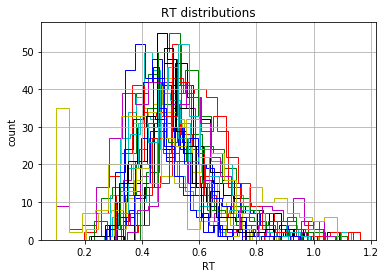

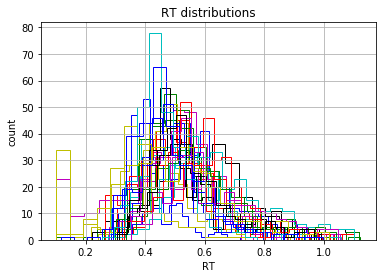

In [3]:
# load data from cateogriztion based on moral valence
dat_M_Categ_val = hddm.load_csv('MS_categ_val_hddm_stim.csv')
dat_M_Categ_val.head(10)

# load data from cateogriztion based on identity
dat_M_Categ_id = hddm.load_csv('MS_categ_id_hddm_stim.csv')
dat_M_Categ_id.head(10)

# flip the error RTs to be negative (shall we do this for the stimuli-code?)
#dat_M_Categ_val = hddm.utils.flip_errors(dat_M_Categ_val) 
#dat_M_Categ_id = hddm.utils.flip_errors(dat_M_Categ_id)

# check the RT distritubtion
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_Categ_val.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_Categ_val_flipped.pdf')  # save the plot if necessary
    
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_Categ_id.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_Categ_id_flipped.pdf')

start_time = time.time() # the start time of the processing

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10001 of 10000 complete in 3322.9 secSetting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10001 of 10000 complete in 3236.6 secSetting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10001 of 10000 complete in 3242.2 secSetting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10001 of 10000 complete in 3250.5 secSetting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10001 of 10000 complete in 3304.9 secSetting model to be non-informative
Adding z to includes.
 [-----------------102%-----------------] 119 of 116 complete in 1578.9 secM_Categ_val_vtz_s DIC: -8338.197974
Running M1 used: 22978.177094 


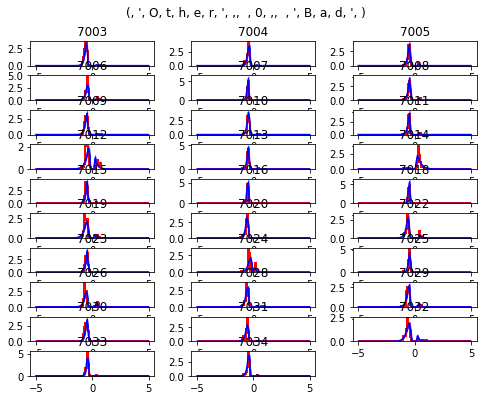

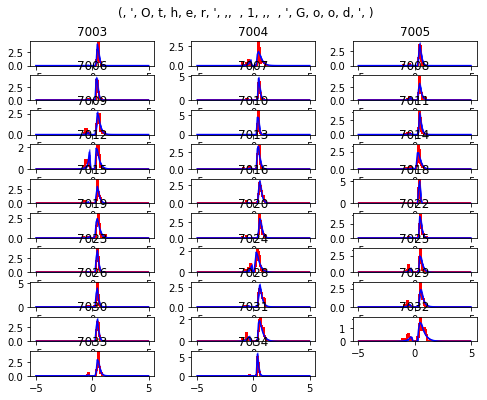

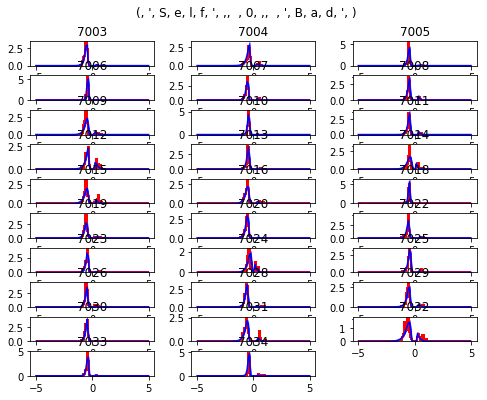

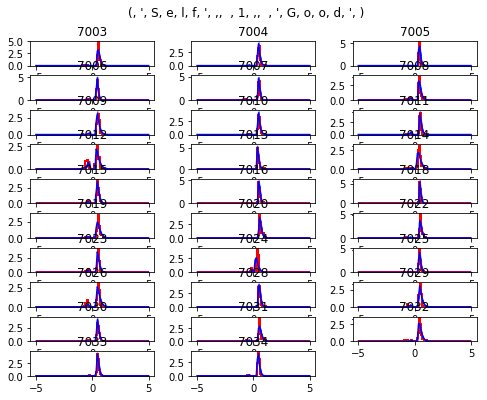

In [3]:
import warnings
warnings.simplefilter('ignore')
nsample = 10000 # number of sampling
nburn   = 1000  # number of burn
nchain   = 1     # number of chain

dateToday = str(date.today())

#for i in range(nchain):
#    dateToday = str(date.today())
#    dbname = "M_Categ_val_vtz_s_" + dateToday + '_Chain_' +  str(i + 2) + '.db'
#    M_Categ_val_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
#                                depends_on = {'v':['val','id'], 't':['val','id'], 'a':['val','id'], 'z':['val','id']})
#                                #split_param='v', drift_criterion=True)
#    M_Categ_val_vtz_s.find_starting_values()
#    M_Categ_val_vtz_s.sample(nsample, burn = nburn, dbname=dbname, db='pickle')
#    M_Categ_val_vtz_s.save("M_Categ_val_vtz_s_" + dateToday + '_Chain_' + str(i + 2))
        
    #M_Categ_val_vtz = hddm.load('M_Categ_val_vtz')

#### model 1 for valence based categorization, free v,t,z
dbname = "M_Categ_val_vtz_s_" + dateToday + '_Chain_' +  str(i + 2) + '.db'
M_Categ_val_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
                                depends_on = {'v':['val','id'], 't':['val','id'], 'z':['val','id']})
                                #split_param='v', drift_criterion=True)
M_Categ_val_vtz_s.find_starting_values()
M_Categ_val_vtz_s.sample(nsample, burn = nburn, dbname=dbname, db='pickle')
   
# save the model
M_Categ_val_vtz_s.save("M_Categ_val_vtz_s_" + dateToday + '_Chain_' + str(i + 2))
#M_Categ_val_vtz = hddm.load("M_Categ_val_vtz_s_" + dateToday + '_Chain_' + str(i + 2))

# doing Gelman-Rubin statistic
models_categ_val = []
for i in range(5):
    m_stim = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
                                depends_on = {'v':['val','id'], 't':['val','id'], 'z':['val','id']})
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_categ_val.append(m_stim)

Categ_val_R_hat_vtz = hddm.analyze.gelman_rubin(models_categ_val)

# save Categ_R_hat_vtz
with open('Categ_val_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Categ_val_R_hat_vtz.items())
    
## ppc
ppc_data_val_vtz_s = hddm.utils.post_pred_gen(M_Categ_val_vtz_s)
ppc_compare_val_vtz_s = hddm.utils.post_pred_stats(dat_M_Categ_val, ppc_data_val_vtz_s)  # MSE 0.031996
ppc_compare_val_vtz_s.to_csv('ppc_compare_val_vtz_s.csv', sep = ',')
M_Categ_val_vtz_s.plot_posterior_predictive()

# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats
# DIC
print("M_Categ_val_vtz_s DIC: %f" % M_Categ_val_vtz_s.dic)  # -7972.3

m1_time = time.time() # the start time of the processing

print("Running M1 used: %f " % (m1_time - start_time))

In [7]:
print("M_Categ_val_vtz_s DIC: %f" % M_Categ_val_vtz_s.dic)  # -8338.197974

M_Categ_val_vtz_s DIC: -8338.197974


In [4]:
# model 2, free v,z
M_Categ_val_vz_s = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
                                depends_on = {'v':['val','id'], 'z':['val','id']})
M_Categ_val_vz_s.find_starting_values()
M_Categ_val_vz_s.sample(nsample, burn = nburn, dbname='traces_val_vt_s.db', db='pickle')
# save the model


Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 2136.9 sec

NameError: name 'M_Categ_val_vt_s' is not defined

In [6]:
#M_Categ_val_vz_s.save('M_Categ_val_vt_s')
#M_Categ_val_vt = hddm.load('M_Categ_val_vt')
    
## ppc
#ppc_data_Categ_val_vz = hddm.utils.post_pred_gen(M_Categ_val_vz_s)
ppc_compare_Categ_val_vz = hddm.utils.post_pred_stats(dat_M_Categ_val, ppc_data_Categ_val_vz)  # MSE 
ppc_compare_Categ_val_vz.to_csv('ppc_compare_val_vz_s.csv', sep = ',')
#M_Categ_vt.plot_posterior_predictive()
# M_Categ_vt.plot_posterior_quantiles()

## DIC
print("M_Categ_val_vz DIC: %f" % M_Categ_val_vz_s.dic) # -8210

M_Categ_val_vz DIC: -8210.661501


In [11]:
for i in range(nchain):
    dateToday = str(date.today())
    dbname = "M_Categ_id_vtz_s_" + dateToday + '_Chain_' +  str(i + 2) 
    M_Categ_id_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_id, include='z', stim_col='stim', 
                                depends_on = {'v':['val','id'], 't':['val','id'], 'a':['val','id'], 'z':['val','id']}, split_param = 'z')
                                #split_param='v', drift_criterion=True)
    M_Categ_id_vtz_s.find_starting_values()
    M_Categ_id_vtz_s.sample(nsample, burn = nburn, dbname=dbname+'.db', db='pickle')
    M_Categ_id_vtz_s.save(dbname)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10001 of 10000 complete in 4496.7 sec

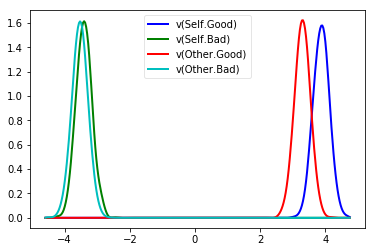

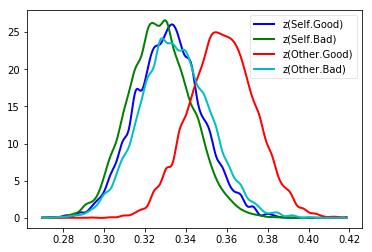

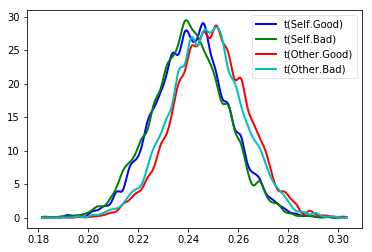

In [4]:
v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['v(Self.Good)','v(Self.Bad)','v(Other.Good)','v(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val])

z_GoodSelf_val,z_BadSelf_val, z_GoodOther_val, z_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['z(Self.Good)','z(Self.Bad)','z(Other.Good)','z(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([z_GoodSelf_val,z_BadSelf_val, z_GoodOther_val, z_BadOther_val])

t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['t(Self.Good)','t(Self.Bad)','t(Other.Good)','t(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val])

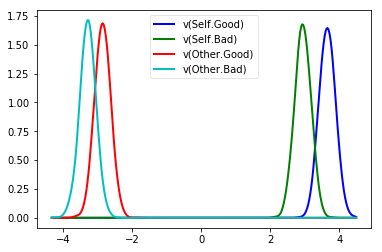

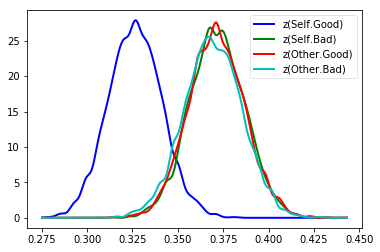

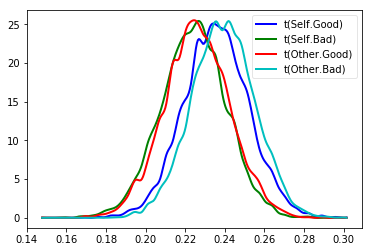

In [8]:
v_GoodSelf_id,v_BadSelf_id, v_GoodOther_id, v_BadOther_id = M_Categ_id_vtz_s.nodes_db.node[['v(Self.Good)','v(Self.Bad)','v(Other.Good)','v(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_id,v_BadSelf_id, v_GoodOther_id, v_BadOther_id])
plt.savefig('ex7_T_vzt_id_v_s.pdf')

z_GoodSelf_id,z_BadSelf_id, z_GoodOther_id, z_BadOther_id = M_Categ_id_vtz_s.nodes_db.node[['z(Self.Good)','z(Self.Bad)','z(Other.Good)','z(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([z_GoodSelf_id,z_BadSelf_id, z_GoodOther_id, z_BadOther_id]) 
plt.savefig('exp7_T_vzt_id_z_s.pdf') 

t_GoodSelf_id,t_BadSelf_id, t_GoodOther_id, t_BadOther_id    = M_Categ_id_vtz_s.nodes_db.node[['t(Self.Good)','t(Self.Bad)','t(Other.Good)','t(Other.Bad)']] 
hddm.analyze.plot_posterior_nodes([t_GoodSelf_id,t_BadSelf_id, t_GoodOther_id, t_BadOther_id]) 
plt.savefig('exp7_T_vzt_id_t_s.pdf') 

In [5]:
print("P(v_M_GoodSelf > v_M_BadSelf ) = ", (v_GoodSelf_val.trace() > v_BadSelf_val.trace()).mean())       # 0.8383
print("P(v_M_GoodOther > v_M_BadOther ) = ", (v_GoodOther_val.trace() > v_BadOther_val.trace()).mean())   # 0.4204
print("P(v_M_GoodSelf > v_M_GoodOther ) = ", (v_GoodSelf_val.trace() > v_GoodOther_val.trace()).mean())   # 0.8427
print("P(v_M_BadSelf > v_M_BadOther ) = ", (v_BadSelf_val.trace() > v_BadOther_val.trace()).mean())       # 0.4202

P(v_M_GoodSelf > v_M_BadSelf ) =  1.0
P(v_M_GoodOther > v_M_BadOther ) =  1.0
P(v_M_GoodSelf > v_M_GoodOther ) =  0.951666666667
P(v_M_BadSelf > v_M_BadOther ) =  0.640222222222


In [10]:
print("P(v_I_GoodSelf > v_I_BadSelf ) = ", (v_GoodSelf_id.trace() > v_BadSelf_id.trace()).mean())         # 0.9788
print("P(v_I_GoodOther > v_I_BadOther ) = ", (v_GoodOther_id.trace() > v_BadOther_id.trace()).mean())     # 0.164
print("P(v_I_GoodSelf > v_I_GoodOther ) = ", (v_GoodSelf_id.trace() > v_GoodOther_id.trace()).mean())     # 0.9898
print("P(v_I_BadSelf > v_I_BadOther ) = ", (v_BadSelf_id.trace() > v_BadOther_id.trace()).mean())         # 0.247

P(v_I_GoodSelf > v_I_BadSelf ) =  0.984444444444
P(v_I_GoodOther > v_I_BadOther ) =  0.906
P(v_I_GoodSelf > v_I_GoodOther ) =  1.0
P(v_I_BadSelf > v_I_BadOther ) =  1.0
